# 1. 데이터 읽어오기

In [1]:
import pandas as pd
import numpy as np
import random
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

# 2. 데이터 확인

In [3]:
train.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


## 1) 결측값 

In [4]:
train.isna().sum()

ID                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,3.923313,120.946319,68.895706,20.440184,80.878834,31.947393,0.465133,33.510736,0.349693
std,3.327529,31.992394,19.183843,15.918604,117.748315,7.460975,0.329496,11.824817,0.477239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.363000,29.500000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,126.000000,36.425000,0.607750,41.000000,1.000000
max,15.000000,199.000000,114.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


## 2) target(Outcome)의 빈도 및 비율 확인 

In [6]:
train['Outcome'].value_counts()

Outcome
0    424
1    228
Name: count, dtype: int64

In [7]:
# normalize 인자의 값을 True를 설정하여 비율 확인
train['Outcome'].value_counts(normalize = True)

Outcome
0    0.650307
1    0.349693
Name: proportion, dtype: float64

## 3) feature 변수의 분포 확인

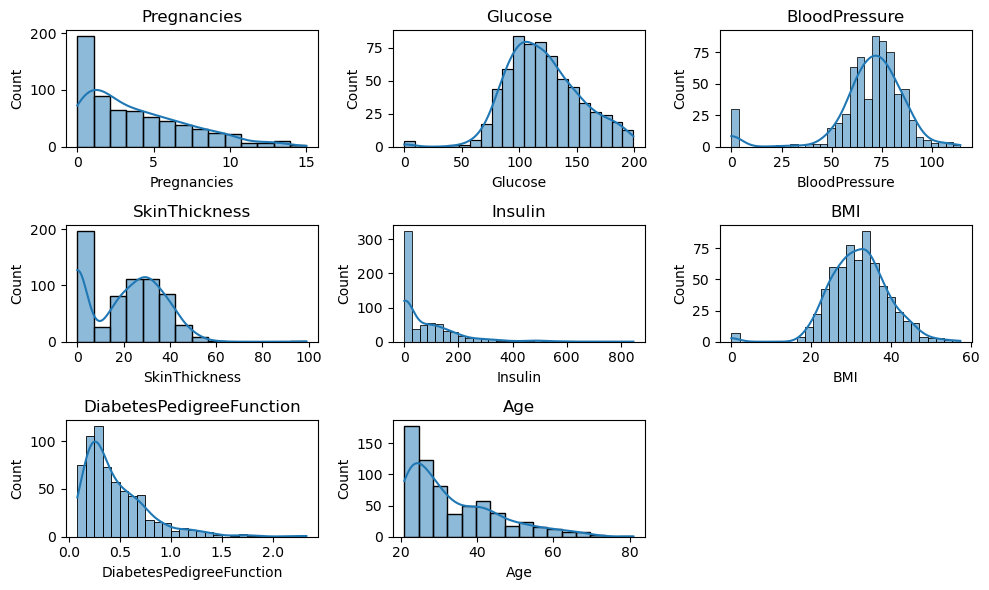

In [8]:
features = train.columns[1:-1 ]

plt.figure(figsize=(10,6))

for idx, feature in enumerate(features):
  ax1 = plt.subplot(3,3,idx+1)
  plt.title(feature)
  plt.tight_layout()
  sns.histplot(x=feature, data = train,kde=True)

plt.show()

## 4) feature들의 target class별 빈도수 시각화

<Figure size 800x400 with 0 Axes>

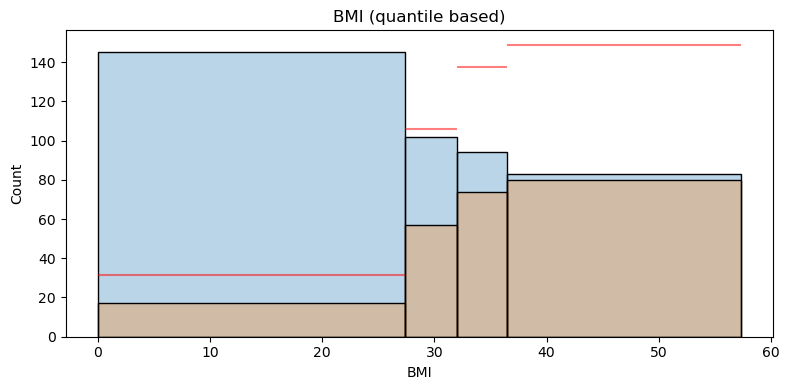

In [9]:
selected_feature = 'BMI'  # 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

plt.figure(figsize=(8,4))

# 사분위 수 계산
q1 = np.percentile(train[selected_feature], 25)
q2 = np.percentile(train[selected_feature], 50)
q3 = np.percentile(train[selected_feature], 75)
q4 = np.percentile(train[selected_feature], 100)

q_lst = [ 0, q1, q2, q3, q4]

# target class 1의 갯수 대비 target class 0의 갯수의 비율 구하기
num_class0 = len(train [ train['Outcome'] == 0 ])
num_class1 = len(train [ train['Outcome'] == 1 ])

ratio_class1_class0 = num_class0 / num_class1

# 히스토그램 그리기
plt.figure(figsize=(8, 4))
h0_ax1 = sns.histplot(data=train[train['Outcome'] == 0], x=selected_feature, bins = q_lst,  alpha=0.3,  label='Outcome = 0')
h1_ax1 = sns.histplot(data=train[train['Outcome'] == 1], x=selected_feature, bins = q_lst,  alpha=0.3,  label='Outcome = 1')

# target 변수의 class가 1일 때의 각 bin의 높이(개수)와 경계값을 얻어옵니다
h1_heights, h1_edges = np.histogram(train[train['Outcome'] == 1][selected_feature], bins=q_lst)

# target class 1의 갯수 대비 target class 0의 갯수의 비율과 일치하는 각 구간의 수평선을 그린다
for i in range(len(h1_heights)):
    plt.hlines(y=h1_heights[i] * ratio_class1_class0 , xmin=h1_edges[i], xmax=h1_edges[i+1], linestyles='solid', colors='red', alpha=0.5)

plt.gca().set_title(f"{selected_feature} (quantile based)")

plt.tight_layout()
plt.show()

## 5) feature들의 분포 및 이상치 탐색

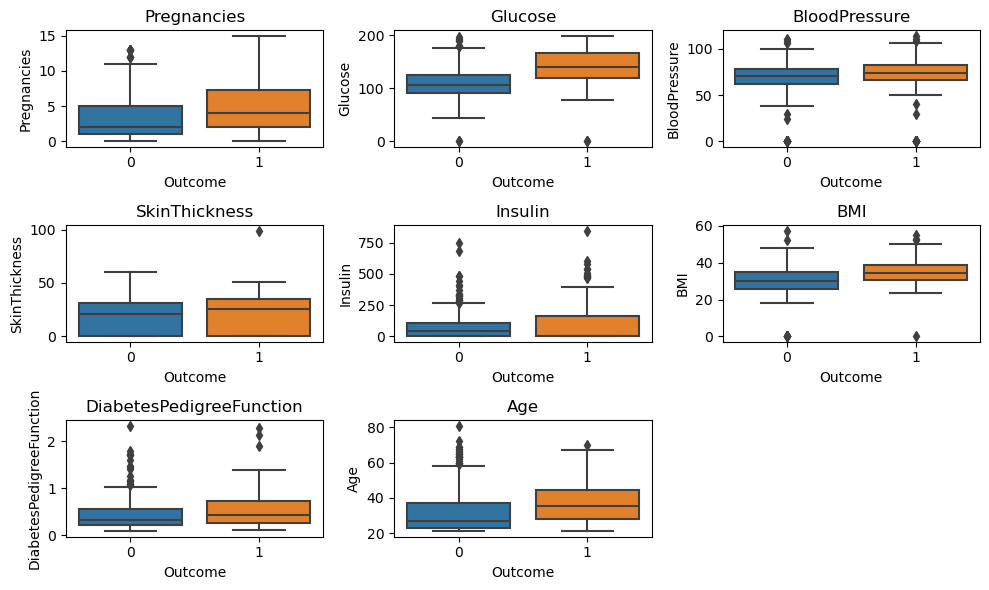

In [10]:
features = train.columns[1:-1 ]

plt.figure(figsize=(10,6))

for idx, feature in enumerate(features):
  ax1 = plt.subplot(3,3,idx+1)
  plt.title(feature)
  plt.tight_layout()
  sns.boxplot(x='Outcome', y=feature, data = train)

plt.show()

## 6) feature 변수쌍과 target과의 연관관계 시각화

<Figure size 300x200 with 0 Axes>

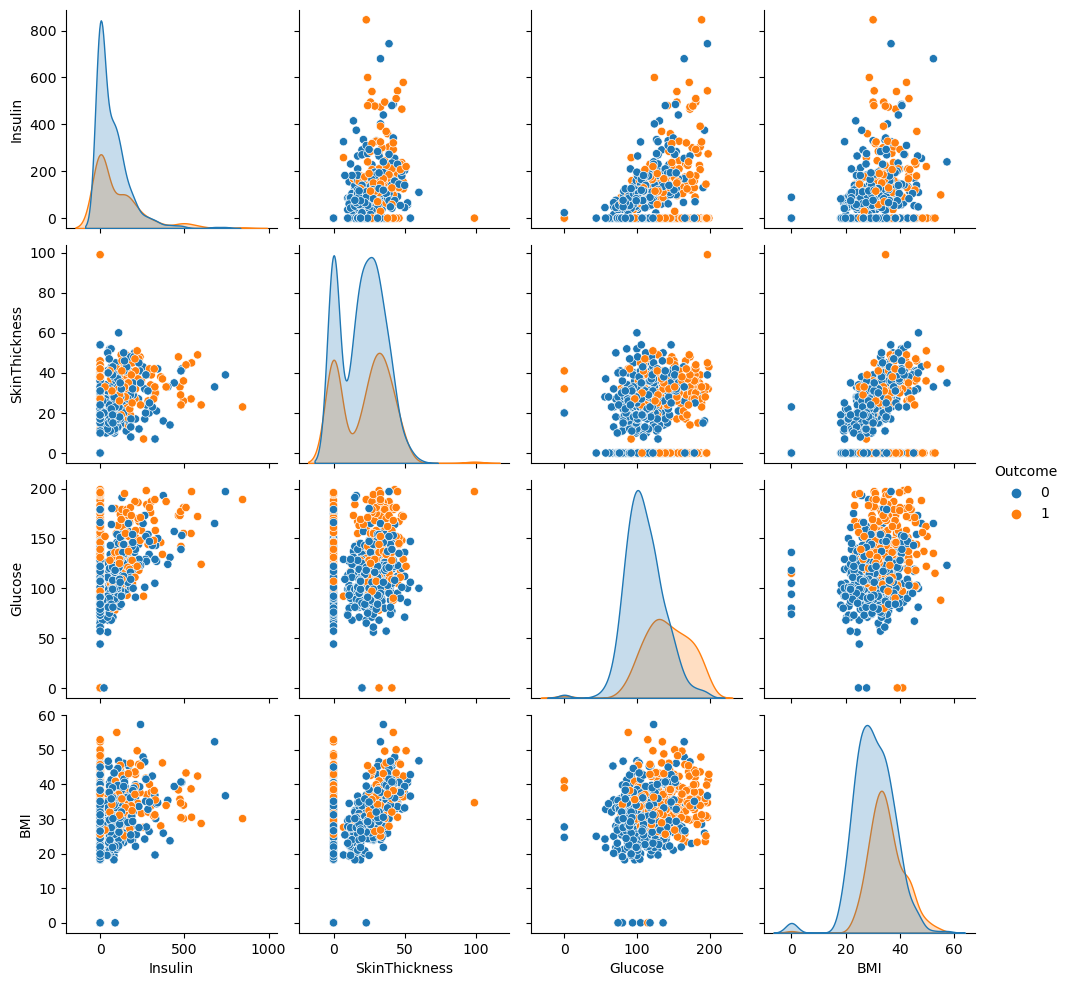

In [11]:
plt.figure(figsize=(3,2))

#features_to_analyze = train.columns[1:]
features_to_analyze = ['Insulin', 'SkinThickness', 'Glucose', 'BMI', 'Outcome']
sns.pairplot(train[features_to_analyze], hue='Outcome')

plt.show()

## 7) 수치형 feature와 이진 범주형 target간의 상관관계

In [12]:
from scipy.stats import pointbiserialr

correlation_org_lst, correlation_dealout_lst = [], []
p_value_org_lst, p_value_dealout_lst = [], []

feature_lst = train.columns[1:-1].to_list()

# 점 이연 상관계수 계산 및 출력
for feature in feature_lst:
    correlation_org, p_value_org = pointbiserialr (train[feature], train['Outcome'])
    correlation_org_lst.append(correlation_org)
    p_value_org_lst.append(p_value_org)


# 데이터프레임 생성
correlation_dict = {'Feature': feature_lst,
                    'correlation_org': correlation_org_lst,
                    'p_value_org' : p_value_org_lst }

correlation_df = pd.DataFrame(correlation_dict)

display(correlation_df)

,Feature,correlation_org,p_value_org
0,Pregnancies,0.211340,5.102077e-08
1,Glucose,0.460108,1.798069e-35
2,BloodPressure,0.049459,2.072204e-01
3,SkinThickness,0.052094,1.840018e-01
4,Insulin,0.123246,1.616097e-03
5,BMI,0.294390,1.676326e-14
6,DiabetesPedigreeFunction,0.173584,8.283545e-06
7,Age,0.218183,1.818929e-08


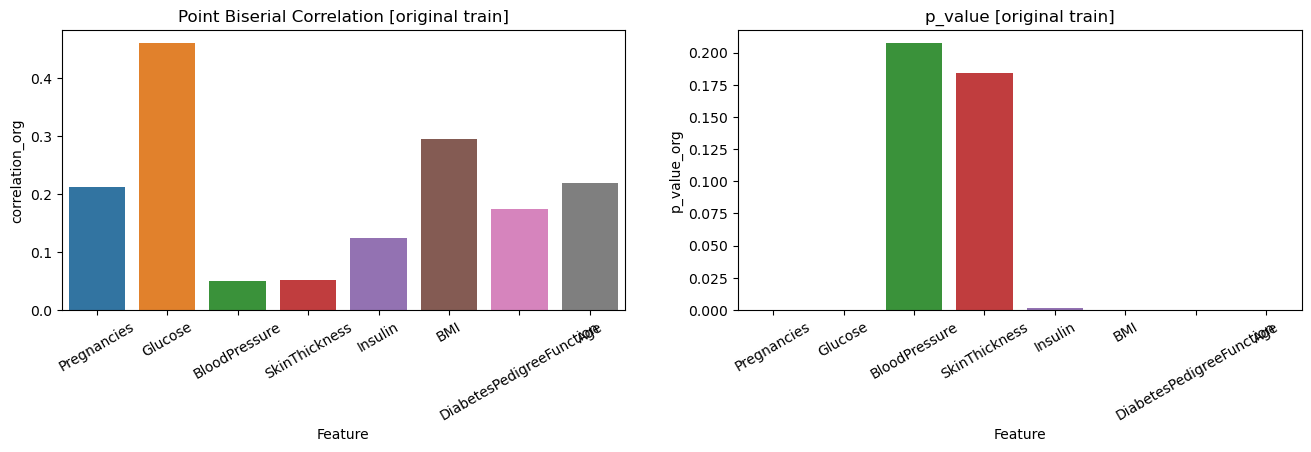

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Seaborn barplot

plt.figure(figsize=(16, 8))

plt.subplot(2,2,1)
sns.barplot(x='Feature', y='correlation_org', data=correlation_df)
plt.gca().set_title("Point Biserial Correlation [original train]")
plt.gca().set_xticklabels(feature_lst, rotation=30)

plt.subplot(2,2,2)
sns.barplot(x='Feature', y='p_value_org', data=correlation_df)
plt.gca().set_xticklabels(feature_lst, rotation=30)
plt.gca().set_title("p_value [original train]")

plt.show()

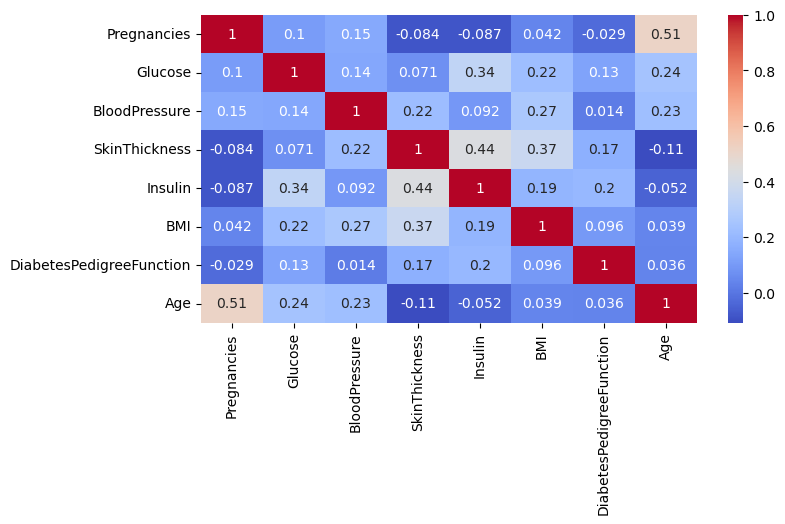

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

features = train.columns[1:-1]
# 이번 셀에서 출력할 이미지 크기를 지정합니다.
plt.figure(figsize = (8,4))

# annot을 False로 설정하면 각 셀의 수치가 표기되지 않습니다.
sns.heatmap(train[features].corr(), cmap = "coolwarm", annot = True)
plt.show()

## 8) 다중 공선성과 VIF

,features,VIF
0,Pregnancies,3.258236
1,Glucose,16.758235
2,BloodPressure,14.606656
3,SkinThickness,3.905130
4,Insulin,2.064910
5,BMI,18.905627
6,DiabetesPedigreeFunction,3.119245
7,Age,12.800928


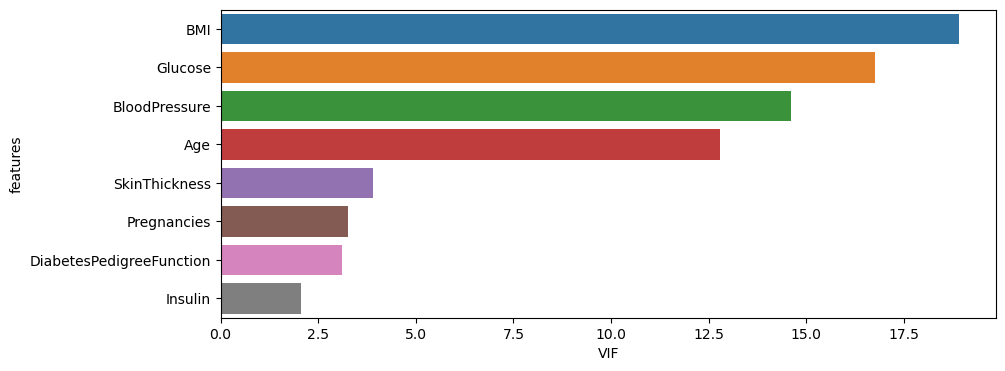

In [15]:
# Import required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_org = train.columns[1:-1]
train_x = train[features_org]

vif = pd.DataFrame()
vif["features"] = train_x.columns

# 빈 리스트를 생성합니다.
VIF_list = []

# 각 피처에 대해 반복합니다.
for i in range(len(train_x.columns)):

    # variance_inflation_factor 함수를 사용하여 해당 피처의 VIF 값을 계산합니다.
    VIF_value = variance_inflation_factor(train_x.values, i)

    # 계산된 VIF 값을 리스트에 추가합니다.
    VIF_list.append(VIF_value)

# VIF 값 리스트를 DataFrame에 추가합니다.
vif["VIF"] = VIF_list

display(vif)

# Set the figure size
plt.figure(figsize=(10, 4))

# Create a bar plot of VIF values
sns.barplot(x="VIF", y="features", data=vif.sort_values("VIF", ascending=False))

# Show the plot
plt.show() 

# 3. EDA

## 1)  기본 교차 검증 성능

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

features_org = train.columns[1:-1]

train_x = train[features_org]
train_y = train['Outcome']

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

display("#######  기본 교차 검증 성능  #########")

RF_model = RandomForestClassifier(random_state = 42)
cv_result = cross_validate(RF_model, train_x, train_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result = pd.DataFrame(cv_result, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result)
display(df_cv_result.describe().loc['mean',:].to_frame().T)

'#######  기본 교차 검증 성능  #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.736196,0.652174,0.526316,0.582524
1,0.736196,0.640000,0.561404,0.598131
2,0.730061,0.666667,0.456140,0.541667
3,0.742331,0.631579,0.631579,0.631579


,test_accuracy,test_precision,test_recall,test_f1
mean,0.736196,0.647605,0.54386,0.588475


## 2)  z_score 기반의 이상치 제거 및 교차 검증 성능 변화 확인

In [17]:
from scipy import stats

# Z-score 기반 이상치 제거
z_scores = np.abs(stats.zscore (train_x))

threshold = 3  # 이 값을 조절하여 이상치로 간주되는 임계점을 설정합니다.
train_zscore = train.copy()[(z_scores  < threshold).all(axis=1)]

display(f"z_score 기반의 이상치 제거한 갯수 : {len(train) - len(train_zscore)} 개, 비율 : {(len(train) - len(train_zscore))/len(train) * 100.0}")

# 데이터 업데이트
train_zscore_x = train_zscore[features_org]
train_zscore_y = train_zscore['Outcome']

display("####### Z-score 기반 이상치 제거 후 교차 검증 성능 #########")

RF_model = RandomForestClassifier(random_state=42)
cv_result_zscore = cross_validate(RF_model, train_zscore_x, train_zscore_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_zscore = pd.DataFrame(cv_result_zscore, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])


display(df_cv_result_zscore)
display(df_cv_result_zscore.describe().loc['mean',:].to_frame().T)

'z_score 기반의 이상치 제거한 갯수 : 69 개, 비율 : 10.582822085889571'

'####### Z-score 기반 이상치 제거 후 교차 검증 성능 #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.767123,0.684211,0.541667,0.604651
1,0.739726,0.656250,0.437500,0.525000
2,0.739726,0.647059,0.458333,0.536585
3,0.827586,0.789474,0.638298,0.705882


,test_accuracy,test_precision,test_recall,test_f1
mean,0.76854,0.694248,0.518949,0.59303


## 3)  feature pair의 조합 연산 통한 새로운 feature 생성

In [18]:
import itertools

# 기존 피처의 조합을 생성하고, 새로운 피처를 추가한 후 각 조합에 대한 교차 검증 점수를 계산합니다.
# 그 중에서 가장 높은 정확도를 가진 피처만 선택합니다.

# RandomForest 모델과 KFold 객체를 생성합니다.
rf_model = RandomForestClassifier(random_state = 42)


# 주어진 피처의 조합을 생성합니다.
features_subset = ['Insulin', 'Age', 'BMI']
feature_combinations = list(itertools.combinations(features_subset, 2))

cv_scores = {}
for feature_pair in feature_combinations:
    feature1, feature2 = feature_pair

    train_try = train_zscore_x.copy()

    # 새로운 피처를 추가합니다.
    train_try[f'{feature1}_{feature2}_Diff'] = train_try[feature1] - train_try[feature2]
    train_try[f'{feature1}_{feature2}_Sum'] = train_try[feature1] + train_try[feature2]
    train_try[f'{feature1}_{feature2}_Ratio'] = train_try[feature1] / (train_try[feature2].replace(0, train_try[feature2].median()))

    features_to_evaluate = [f'{feature1}_{feature2}_Diff', f'{feature1}_{feature2}_Sum', f'{feature1}_{feature2}_Ratio']

    # 각 피처에 대한 교차 검증 점수를 계산합니다.
    feature_scores = {}
    for feature in features_to_evaluate:
        scores = cross_val_score(rf_model, pd.concat([train_zscore_x, train_try[feature]], axis=1), train_zscore_y, cv=kf, scoring='accuracy')
        feature_scores[feature] = scores.mean()

    # 가장 높은 점수를 가진 피처만 선택합니다.
    best_feature = max(feature_scores, key=feature_scores.get)
    cv_scores[best_feature] = feature_scores[best_feature]
    display(f"cv_scores[{best_feature}] : {cv_scores[best_feature]}")

# 점수를 기준으로 정렬합니다.

# 먼저, cv_scores 딕셔너리의 각 항목을 리스트로 변환합니다.
items = list(cv_scores.items())

# 그 다음, 이 리스트를 정렬합니다. 각 항목은 (key, value) 쌍이므로, item[1]을 사용하여 값을 기준으로 정렬합니다.
sorted_items = sorted(items, key=lambda item: item[1], reverse=True)

# 이제 이 정렬된 리스트를 다시 딕셔너리로 변환합니다.
cv_scores = dict(sorted_items)

display(cv_scores)

'cv_scores[Insulin_Age_Sum] : 0.7839631554085971'

'cv_scores[Insulin_BMI_Ratio] : 0.7822626358053849'

'cv_scores[Age_BMI_Ratio] : 0.7668162494095419'

{'Insulin_Age_Sum': 0.7839631554085971,
 'Insulin_BMI_Ratio': 0.7822626358053849,
 'Age_BMI_Ratio': 0.7668162494095419}

## 4)  feature pair의 조합 연산 통한 feature 추가하여 교차 검증 성능 확인

In [19]:
from sklearn.ensemble import RandomForestClassifier

# 피쳐 생성
train_try = train_zscore.copy()

train_try['Insulin_Age_Sum'] = train_try['Insulin'] + train_try['Age']

train_try['BMI'] = train_try['BMI'].replace(0, train_try['BMI'].median())
train_try['Insulin_BMI_Ratio'] = train_try['Insulin'] / train_try['BMI']

# 피쳐 추가
train_prep = train_zscore.copy()
train_prep['Insulin_Age_Sum'] = train_try['Insulin_Age_Sum']
train_prep['Insulin_BMI_Ratio'] = train_try['Insulin_BMI_Ratio']

train_prep_y= train_prep['Outcome']
train_prep_x = train_prep.drop(['ID', 'Outcome'], axis=1)

RF_model_prep = RandomForestClassifier(random_state=42)
cv_result_prep = cross_validate(RF_model_prep, train_prep_x, train_zscore_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_prep = pd.DataFrame(cv_result_prep, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_prep)
display(df_cv_result_prep.describe().loc['mean',:].to_frame().T)

display(train_prep_x.head(5))

,test_accuracy,test_precision,test_recall,test_f1
0,0.773973,0.702703,0.541667,0.611765
1,0.773973,0.741935,0.479167,0.582278
2,0.739726,0.625000,0.520833,0.568182
3,0.841379,0.800000,0.680851,0.735632


,test_accuracy,test_precision,test_recall,test_f1
mean,0.782263,0.71741,0.555629,0.624464


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_Age_Sum,Insulin_BMI_Ratio
0,4,103,60,33,192,24.0,0.966,33,225,8.000000
1,10,133,68,0,0,27.0,0.245,36,36,0.000000
2,4,112,78,40,0,39.4,0.236,38,38,0.000000
3,1,119,88,41,170,45.3,0.507,26,196,3.752759
4,1,114,66,36,200,38.1,0.289,21,221,5.249344


## 5) 결측치(0)

In [20]:
features_to_check = ['SkinThickness', 'Insulin', 'Glucose', 'BMI', 'BloodPressure']

for feature in features_to_check:
    n_missing = len(train[train[feature] == 0])
    ratio_missing = round(n_missing / len(train) * 100.0, 1)
    print(f"{feature} 결측치 갯수 : {n_missing}/{len(train)} ({ratio_missing})%")

SkinThickness 결측치 갯수 : 195/652 (29.9)%
Insulin 결측치 갯수 : 318/652 (48.8)%
Glucose 결측치 갯수 : 4/652 (0.6)%
BMI 결측치 갯수 : 7/652 (1.1)%
BloodPressure 결측치 갯수 : 30/652 (4.6)%


## train, test data의 결측치 분포 비교

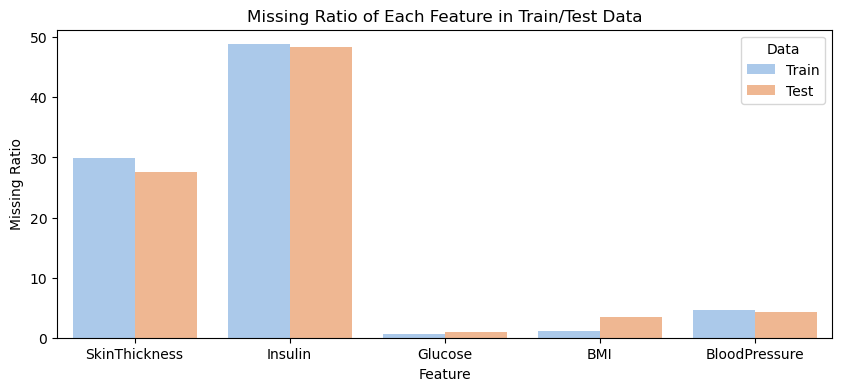

In [21]:
# seaborn의 색상 팔레트를 변경합니다.
sns.set_palette('pastel')

# Train 데이터의 결측치 비율을 계산합니다.
missing_ratio_train = []
for feature in features_to_check:
    n_missing = len(train[train[feature] == 0])
    ratio_missing = round(n_missing / len(train) * 100.0, 1)
    missing_ratio_train.append(ratio_missing)

# Test 데이터의 결측치 비율을 계산합니다.
missing_ratio_test = []
for feature in features_to_check:
    n_missing = len(test[test[feature] == 0])
    ratio_missing = round(n_missing / len(test) * 100.0, 1)
    missing_ratio_test.append(ratio_missing)

# 각각의 데이터프레임으로 변환합니다.
missing_df_train = pd.DataFrame({'Feature': features_to_check, 'Missing Ratio': missing_ratio_train, 'Data': 'Train'})
missing_df_test = pd.DataFrame({'Feature': features_to_check, 'Missing Ratio': missing_ratio_test, 'Data': 'Test'})

# 두 데이터프레임을 합쳐서 새로운 데이터프레임을 만듭니다.
missing_df = pd.concat([missing_df_train, missing_df_test])

# 시각화를 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='Missing Ratio', hue='Data', data=missing_df)
plt.title('Missing Ratio of Each Feature in Train/Test Data')
plt.show()

## 6) Insulin

## Insulin 결측치 그룹과 정상 그룹 간 다른 피처들의 결측치 비율 비교

,Feature,Missing Insulin,Normal Insulin
0,SkinThickness,61.320755,0.000000
1,Glucose,0.943396,0.299401
2,BMI,1.886792,0.299401
3,BloodPressure,9.433962,0.000000


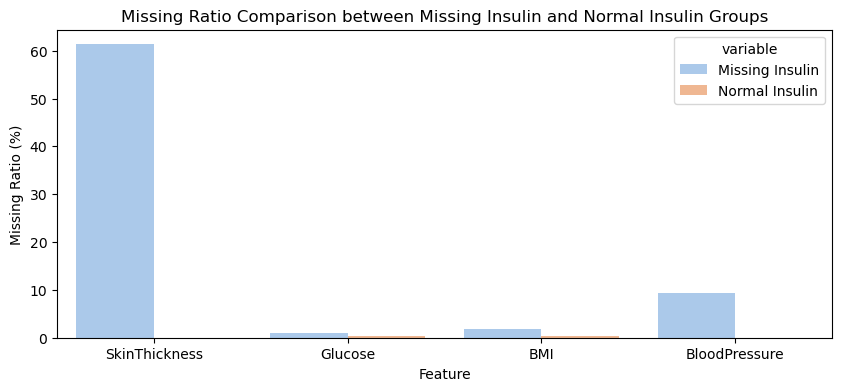

In [22]:
# 'Insulin'이 결측치인 데이터와 결측치가 아닌 데이터를 분리
train_missing_insulin = train[train['Insulin'] == 0]
train_normal_insulin = train[train['Insulin'] != 0]

# 'Insulin'을 제외한 피처 리스트
features_to_check = ['SkinThickness', 'Glucose', 'BMI', 'BloodPressure']


# 각 데이터 프레임에 대한 결측치 비율 계산
missing_insulin_ratios = [len(train_missing_insulin[train_missing_insulin[feature] == 0]) / len(train_missing_insulin) * 100.0 for feature in features_to_check]
normal_insulin_ratios = [len(train_normal_insulin[train_normal_insulin[feature] == 0]) / len(train_normal_insulin) * 100.0 for feature in features_to_check]

# 데이터 프레임 생성
df_missing_ratios = pd.DataFrame({
    'Feature': features_to_check,
    'Missing Insulin': missing_insulin_ratios,
    'Normal Insulin': normal_insulin_ratios
})

display(df_missing_ratios)

# 데이터 프레임을 긴 형식(long format)으로 변경
df_missing_ratios_melted = df_missing_ratios.melt(id_vars='Feature', value_vars=['Missing Insulin', 'Normal Insulin'])

# 시각화
plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='value', hue='variable', data=df_missing_ratios_melted)
plt.ylabel('Missing Ratio (%)')
plt.title('Missing Ratio Comparison between Missing Insulin and Normal Insulin Groups')
plt.show()

## Insulin 결측치 데이터셋과 정상 데이터셋의 각 feature의 분포 비교

C:\Users\user\AppData\Local\Temp\ipykernel_22940\1310620491.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df2[feature], bw_adjust=0.5, label=label2)


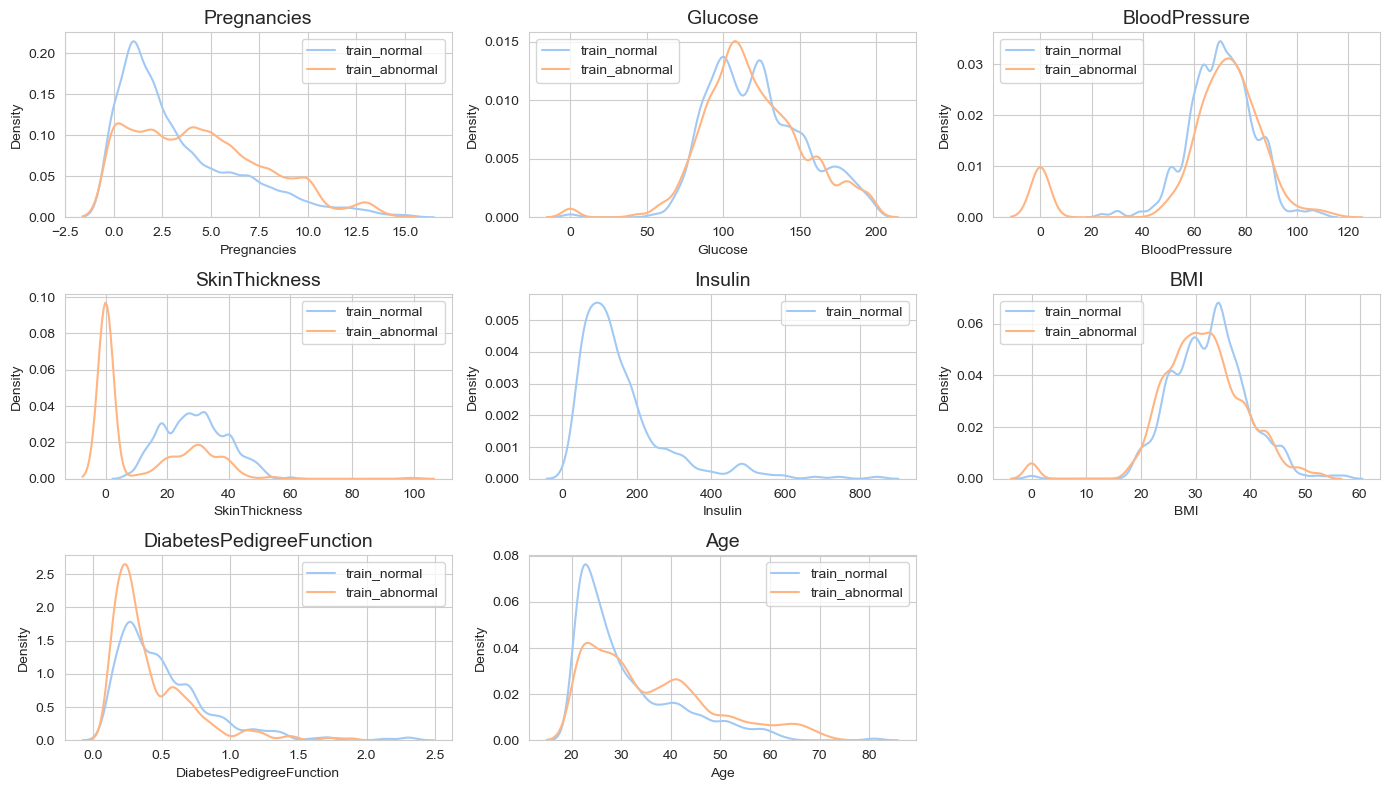

In [23]:
features_org = train.columns[1:-1]

# 특성들의 분포를 시각화하기 위한 함수
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure(figsize=(14,8))
    for feature in features:
        i += 1
        plt.subplot(3,3,i)
        sns.kdeplot(df1[feature], bw_adjust=0.5, label=label1)
        sns.kdeplot(df2[feature], bw_adjust=0.5, label=label2)
        plt.title(feature, fontsize=14)
        plt.legend()
    plt.tight_layout()
    plt.show()

# train_normal과 train_abnormal 데이터셋의 특성 분포 시각화
plot_feature_distribution(train_normal_insulin, train_missing_insulin, "train_normal", "train_abnormal", features_org)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

features = train.columns[1:-1]

train_normal_insulin_x = train_normal_insulin[features]
train_noraml_insulin_y = train_normal_insulin['Outcome']

train_missing_insulin_x = train_missing_insulin[features].drop('Insulin', axis=1)
train_missing_insulin_y = train_missing_insulin['Outcome']

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

display("#######  Insulin 결측치 없는 데이터셋  #########")

RF_model_normal = RandomForestClassifier(random_state = 42)
cv_result_normal = cross_validate(RF_model_normal, train_normal_insulin_x, train_noraml_insulin_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_normal = pd.DataFrame(cv_result_normal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_normal)
display(df_cv_result_normal.describe().loc['mean',:].to_frame().T)

display("#######  Insulin 결측치 데이터셋  #########")

RF_model_abnormal = RandomForestClassifier(random_state = 42)
cv_result_abnormal = cross_validate(RF_model_abnormal, train_missing_insulin_x, train_missing_insulin_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_abnormal = pd.DataFrame(cv_result_abnormal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_abnormal)
display(df_cv_result_abnormal.describe().loc['mean',:].to_frame().T)

'#######  Insulin 결측치 없는 데이터셋  #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.821429,0.772727,0.629630,0.693878
1,0.773810,0.666667,0.592593,0.627451
2,0.807229,0.777778,0.538462,0.636364
3,0.759036,0.652174,0.555556,0.600000


,test_accuracy,test_precision,test_recall,test_f1
mean,0.790376,0.717336,0.57906,0.639423


'#######  Insulin 결측치 데이터셋  #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.762500,0.761905,0.533333,0.627451
1,0.712500,0.642857,0.580645,0.610169
2,0.683544,0.600000,0.500000,0.545455
3,0.734177,0.655172,0.633333,0.644068


,test_accuracy,test_precision,test_recall,test_f1
mean,0.72318,0.664984,0.561828,0.606786


## 인슐린 결측치가 없는 정상 train 데이터(train_normal) 추출

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# feature set 정의
features_org = list(train.columns)[1:-1]

#  train 데이터에서 Insulin이 0이 아닌 데이터 추출
train_normal = train.copy()
train_normal = train_normal.loc[train_normal['Insulin'] != 0]

train_normal_x = train_normal[features_org]
train_normal_y = train_normal['Outcome']

display(train_normal.head(5))

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
5,TRAIN_005,3,78,50,32,88,31.0,0.248,26,1
6,TRAIN_006,1,91,54,25,100,25.2,0.234,23,0


## 인슐린 결측치 데이터(train_abnormal) 추출

In [26]:
features_org = list(train.columns)[1:-1]

#  train 데이터에서 Insulin이 0(결측치)인 데이터 추출
train_abnormal = train.copy()
train_abnormal = train_abnormal.loc[train_abnormal['Insulin'] == 0]

test_abnormal = test.copy()
test_abnormal = test_abnormal.loc[test_abnormal['Insulin'] == 0]
display(train_abnormal.head(5))

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
8,TRAIN_008,1,124,60,32,0,35.8,0.514,21,0
10,TRAIN_010,4,145,82,18,0,32.5,0.235,70,1
15,TRAIN_015,5,103,108,37,0,39.2,0.305,65,0


## train_abnormal에 대한 기본 교차 검증 성능 확인

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold

train_abnormal_x = train_abnormal[features_org]
train_abnormal_y = train_abnormal['Outcome']

kf = KFold(n_splits=4, shuffle=True, random_state=42)

RF_model_abnormal = RandomForestClassifier(random_state = 42)

cv_result_abnormal = cross_validate(RF_model_abnormal, train_abnormal_x, train_abnormal_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_abnormal = pd.DataFrame(cv_result_abnormal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(cv_result_abnormal)
display(df_cv_result_abnormal)
display(df_cv_result_abnormal.describe().loc['mean',:].to_frame().T)

{'fit_time': array([0.1205349 , 0.11317968, 0.11977673, 0.11870956]),
 'score_time': array([0.01299787, 0.0117681 , 0.01233411, 0.0114603 ]),
 'test_accuracy': array([0.725     , 0.7375    , 0.74683544, 0.72151899]),
 'test_precision': array([0.7826087 , 0.5625    , 0.80769231, 0.55555556]),
 'test_recall': array([0.51428571, 0.72      , 0.58333333, 0.6       ]),
 'test_f1': array([0.62068966, 0.63157895, 0.67741935, 0.57692308])}

,test_accuracy,test_precision,test_recall,test_f1
0,0.725000,0.782609,0.514286,0.620690
1,0.737500,0.562500,0.720000,0.631579
2,0.746835,0.807692,0.583333,0.677419
3,0.721519,0.555556,0.600000,0.576923


,test_accuracy,test_precision,test_recall,test_f1
mean,0.732714,0.677089,0.604405,0.626653


## 인슐린 결측 데이터 (train_abnormal)에 'SkinThickness' 결측치 처리

In [29]:
train_applied = train.copy()
from sklearn.preprocessing import StandardScaler

# 'SkinThickness' 결측치 대체에 사용할 feature 선택
features_for_skin = ['Pregnancies', 'Glucose', 'BloodPressure',  'BMI', 'DiabetesPedigreeFunction', 'Age']

# 'SkinThickness' 값이 0인 데이터와 그렇지 않은 데이터로 분리
train_normal_skin = train_applied[train_applied['SkinThickness'] != 0]

train_normal_skin_x = train_normal_skin[features_for_skin]
train_normal_skin_y = train_normal_skin['SkinThickness']

scaler_reg_train = StandardScaler()
train_normal_skin_x_scaled = scaler_reg_train.fit_transform(train_normal_skin_x)

display(train[features_for_skin].head(5))
display(pd.DataFrame(train_normal_skin_x_scaled, columns = features_for_skin).head(5))

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,4,103,60,24.0,0.966,33
1,10,133,68,27.0,0.245,36
2,4,112,78,39.4,0.236,38
3,1,119,88,45.3,0.507,26
4,1,114,66,38.1,0.289,21


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.131861,-0.519744,-0.852777,-1.282968,1.340931,0.110916
1,0.131861,-0.246380,0.526760,1.009190,-0.754366,0.570050
2,-0.785812,-0.033763,1.293169,1.887355,0.023477,-0.531872
3,-0.785812,-0.185632,-0.392932,0.815697,-0.602242,-0.991006
4,-0.174030,-1.279088,-1.619187,-0.241078,-0.719923,-0.531872


In [30]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(train_normal_skin_x_scaled, train_normal_skin_y)

####################################################################
# 학습된 SVC 모델로 'SkinThickness' 결측치 데이터를 예측 대체
####################################################################

train_missing_skin = train_applied[train_applied['SkinThickness'] == 0]
train_missing_skin_x = train_missing_skin[features_for_skin]

train_missing_skin_x_scaled = scaler_reg_train.transform(train_missing_skin_x)

# 결측치가 있는 데이터에 대한 'SkinThickness' 값을 예측
predicted_skin = svm_model.predict(train_missing_skin_x_scaled)

# 예측된 값으로 'SkinThickness' 결측치 대체
train_missing_skin = train_missing_skin.copy()
train_missing_skin.loc[:,'SkinThickness'] = predicted_skin

####################################################################
# 처리된 데이터를 병합
####################################################################
train_dealed_missing_skin = pd.concat([train_normal_skin, train_missing_skin]).sort_index()

display(f"train 결측치 개수 : {len(train[train['SkinThickness'] == 0])}")
display(f"train_dealed_missing_skin 결측치 개수 : {len(train_dealed_missing_skin[train_dealed_missing_skin['SkinThickness'] == 0])}")

'train 결측치 개수 : 195'

'train_dealed_missing_skin 결측치 개수 : 0'

## 'SkinThickness' 결측치 처리후 교차 검증 성능 확인

In [31]:
# 인슐인 결측치 데이터셋 추출
train_abnormal_prep = train_dealed_missing_skin[train_dealed_missing_skin['Insulin'] == 0]
train_abnormal_prep_x = train_abnormal_prep[features_org]


kf = KFold(n_splits=4, shuffle=True, random_state=42)

# RandomForestClassifier로 교차 검증 진행
RF_model_abnormal_prep = RandomForestClassifier(random_state = 42)
cv_result_abnormal_prep = cross_validate(RF_model_abnormal_prep, train_abnormal_prep_x, train_abnormal_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_abnormal_prep = pd.DataFrame(cv_result_abnormal_prep, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_abnormal_prep)
display(df_cv_result_abnormal_prep.describe().loc['mean',:].to_frame().T)

display(f"train_abnormal_prep : {list(train_abnormal_prep.columns)}")

,test_accuracy,test_precision,test_recall,test_f1
0,0.712500,0.750000,0.514286,0.610169
1,0.737500,0.562500,0.720000,0.631579
2,0.784810,0.880000,0.611111,0.721311
3,0.746835,0.592593,0.640000,0.615385


,test_accuracy,test_precision,test_recall,test_f1
mean,0.745411,0.696273,0.621349,0.644611


"train_abnormal_prep : ['ID', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']"

## 'SkinThickness' 결측치 처리후 교차 검증 성능 향상 근거 확인

C:\Users\user\anaconda3\envs\py3_11\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Feature,correlation_abnormal,p_value_abnormal,correlation_abnormal_prep,p_value_abnormal_prep
0,Pregnancies,0.163010,3.557253e-03,0.163010,3.557253e-03
1,Glucose,0.437756,2.554395e-16,0.437756,2.554395e-16
2,BloodPressure,-0.008945,8.737608e-01,-0.008945,8.737608e-01
3,SkinThickness,0.008564,8.790970e-01,0.232579,2.805302e-05
4,Insulin,NaN,NaN,NaN,NaN
5,BMI,0.344766,2.638926e-10,0.344766,2.638926e-10
6,DiabetesPedigreeFunction,0.169882,2.368764e-03,0.169882,2.368764e-03
7,Age,0.108246,5.380991e-02,0.108246,5.380991e-02


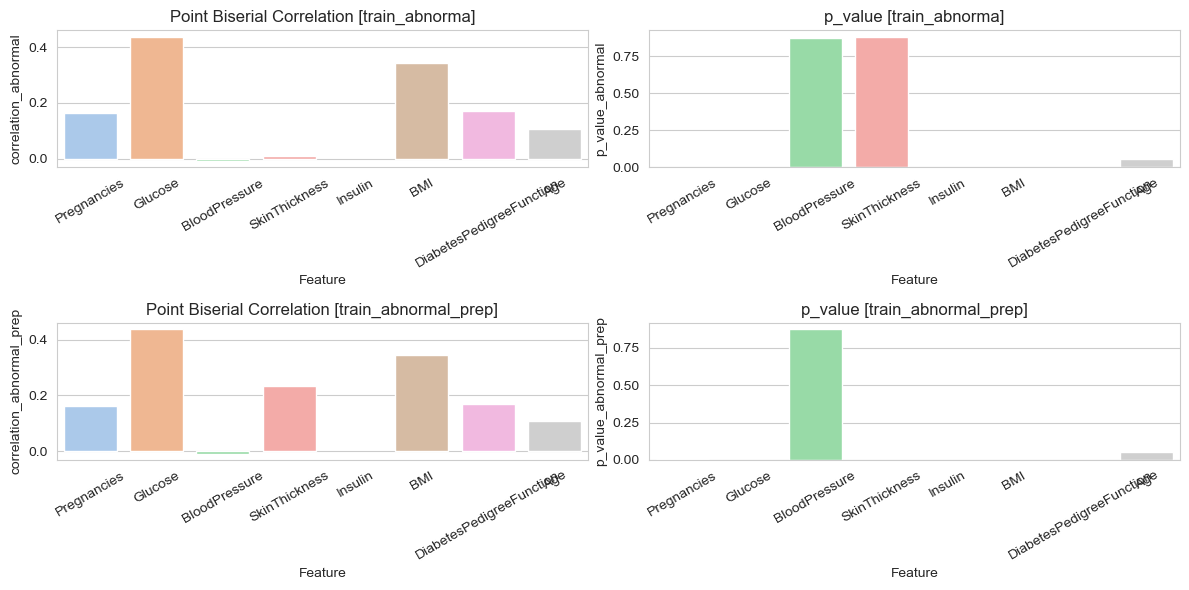

In [32]:
from scipy.stats import pointbiserialr

correlation_abnormal_lst, correlation_abnormal_prep_lst = [], []
p_value_abnormal_lst, p_value_abnormal_prep_lst = [], []

feature_lst = train.columns[1:-1].to_list()

# 점 이연 상관계수 계산 및 출력
for feature in feature_lst:
    correlation_abnormal, p_value_abnormal = pointbiserialr(train_abnormal[feature], train_abnormal['Outcome'])
    correlation_abnormal_lst.append(correlation_abnormal)
    p_value_abnormal_lst.append(p_value_abnormal)


# 점 이연 상관계수 계산 및 출력
for feature in feature_lst:
    correlation_abnormal_prep, p_value_abnormal_prep = pointbiserialr(train_abnormal_prep[feature], train_abnormal_prep['Outcome'])
    correlation_abnormal_prep_lst.append(correlation_abnormal_prep)
    p_value_abnormal_prep_lst.append(p_value_abnormal_prep)


# 데이터프레임 생성
correlation_dict = {'Feature': feature_lst,
                    'correlation_abnormal': correlation_abnormal_lst,
                    'p_value_abnormal' : p_value_abnormal_lst,
                    'correlation_abnormal_prep': correlation_abnormal_prep_lst,
                    'p_value_abnormal_prep' : p_value_abnormal_prep_lst}

correlation_df = pd.DataFrame(correlation_dict)
display(correlation_df)


import matplotlib.pyplot as plt
import seaborn as sns
# Seaborn barplot

plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
sns.barplot(x='Feature', y='correlation_abnormal', data=correlation_df)
plt.gca().set_title("Point Biserial Correlation [train_abnorma]")
plt.gca().set_xticklabels(feature_lst, rotation=30)

plt.subplot(2,2,2)
sns.barplot(x='Feature', y='p_value_abnormal', data=correlation_df)
plt.gca().set_xticklabels(feature_lst, rotation=30)
plt.gca().set_title("p_value [train_abnorma]")

plt.subplot(2,2,3)
sns.barplot(x='Feature', y='correlation_abnormal_prep', data=correlation_df)
plt.gca().set_title("Point Biserial Correlation [train_abnormal_prep]")
plt.gca().set_xticklabels(feature_lst, rotation=30)

plt.subplot(2,2,4)
sns.barplot(x='Feature', y='p_value_abnormal_prep', data=correlation_df)
plt.gca().set_xticklabels(feature_lst, rotation=30)
plt.gca().set_title("p_value [train_abnormal_prep]")

plt.tight_layout()
plt.show()

## train_abnormal 데이터에 feature 조합 통한 새로운 feature 생성 하기

In [33]:
from sklearn.ensemble import RandomForestClassifier

# 피쳐 후보 생성
train_abnormal_try = train_abnormal_prep.copy()

train_abnormal_try['Pregnancies_Age_Diff'] = train_abnormal_try['Pregnancies'] - train_abnormal_try['Age']
train_abnormal_try['Pregnancies_Age_Sum'] = train_abnormal_try['Pregnancies'] + train_abnormal_try['Age']
train_abnormal_try['Pregnancies_Age_Ratio'] = train_abnormal_try['Pregnancies'] / train_abnormal_try['Age']

train_abnormal_try_x = train_abnormal_try.drop('Outcome', axis=1)

features_to_evaluate = ['Pregnancies_Age_Diff', 'Pregnancies_Age_Sum', 'Pregnancies_Age_Ratio']

rf_model = RandomForestClassifier(random_state = 42)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

cv_scores = {}
for feature in features_to_evaluate:

    train_abnormal_add_x = train_abnormal_prep[features_org].copy()

    train_abnormal_add_x[feature] = train_abnormal_try[feature]

    scores = cross_val_score(rf_model, train_abnormal_add_x, train_abnormal_y, cv=kf, scoring='accuracy')
    cv_scores[feature] = scores.mean()

display(f"accuracy : {cv_scores}")

"accuracy : {'Pregnancies_Age_Diff': 0.7264636075949367, 'Pregnancies_Age_Sum': 0.7327531645569619, 'Pregnancies_Age_Ratio': 0.7265822784810126}"

In [34]:
# 피쳐 후보 생성
train_abnormal_try = train_abnormal_prep.copy()

train_abnormal_try['Skin_BMI_Diff'] = train_abnormal_try['SkinThickness'] - train_abnormal_try['BMI']
train_abnormal_try['Skin_BMI_Sum'] = train_abnormal_try['SkinThickness'] + train_abnormal_try['BMI']

bmi_mean = train_abnormal_try[train_abnormal_try['BMI'] !=0]['BMI'].mean()
train_abnormal_try['BMI'] =  train_abnormal_try['BMI'].replace(0, bmi_mean)
train_abnormal_try['Skin_BMI_Ratio'] = train_abnormal_try['SkinThickness'] / train_abnormal_try['BMI']

train_abnormal_try_x = train_abnormal_try.drop('Outcome', axis=1)

features_to_evaluate = ['Skin_BMI_Diff', 'Skin_BMI_Sum', 'Skin_BMI_Ratio']

rf_model = RandomForestClassifier(random_state = 42)

# a) 교차 검증 성능 비교
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#display(train_abnormal_y)

cv_scores = {}
for feature in features_to_evaluate:

    train_abnormal_add_x = train_abnormal_prep[features_org].copy()
    train_abnormal_add_x[feature] = train_abnormal_try[feature]
   
    scores = cross_val_score(rf_model, train_abnormal_add_x, train_abnormal_y, cv=kf, scoring='accuracy')
    cv_scores[feature] = scores.mean()

display(f"accuracy : {cv_scores}")

train_abnormal_prep.loc[:, 'Skin_BMI_Ratio'] = train_abnormal_try['Skin_BMI_Ratio'].copy()

display(f"train_abnormal_prep : {list(train_abnormal_prep.columns)}")
display(train_abnormal_prep.values.shape)

"accuracy : {'Skin_BMI_Diff': 0.7328322784810126, 'Skin_BMI_Sum': 0.7359177215189873, 'Skin_BMI_Ratio': 0.742246835443038}"

C:\Users\user\AppData\Local\Temp\ipykernel_22940\3041543959.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_abnormal_prep.loc[:, 'Skin_BMI_Ratio'] = train_abnormal_try['Skin_BMI_Ratio'].copy()


"train_abnormal_prep : ['ID', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Skin_BMI_Ratio']"

(318, 11)

## train_abnormal 데이터에 선형 판별법 (LDA) 통한 데이터 생성

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA에 사용하는 데이터셋 준비
#features_for_lda = [ 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]
features_for_lda = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Insulin', 'DiabetesPedigreeFunction', 'Age' ]


train_abnormal_try = train_abnormal_prep.copy()[features_for_lda]

scaler_for_lda = StandardScaler()

train_abnormal_try_scaled = scaler_for_lda.fit_transform(train_abnormal_try)

lda_abnormal = LDA()
train_lda_arr = lda_abnormal.fit_transform(train_abnormal_try_scaled, train_abnormal_y)
train_lda = pd.DataFrame(train_lda_arr, columns =['lda'])

# LDA를 통해 변환된 값을 원래의 데이터프레임에 추가
train_abnormal_prep = train_abnormal_prep.reset_index(drop=True)  # 인덱스 리셋
train_abnormal_prep['lda'] = train_lda['lda']

features_prep = features_org + ['Skin_BMI_Ratio', 'lda']
train_abnormal_prep_x = train_abnormal_prep[features_prep].copy()


# 교차 검증
RF_model_lda = RandomForestClassifier(random_state=42)
cv_result_abnormal_prep = cross_validate(RF_model_lda, train_abnormal_prep_x, train_abnormal_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])

df_cv_result_abnormal_prep = pd.DataFrame(cv_result_abnormal_prep, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_abnormal_prep)
display(df_cv_result_abnormal_prep.describe().loc['mean',:].to_frame().T)

display(train_abnormal_prep_x.head(5))
display(train_abnormal_prep.values.shape)

,test_accuracy,test_precision,test_recall,test_f1
0,0.725000,0.809524,0.485714,0.607143
1,0.775000,0.612903,0.760000,0.678571
2,0.772152,0.950000,0.527778,0.678571
3,0.721519,0.551724,0.640000,0.592593


,test_accuracy,test_precision,test_recall,test_f1
mean,0.748418,0.731038,0.603373,0.63922


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin_BMI_Ratio,lda
0,10,133,68,28.420336,0,27.0,0.245,36,1.052605,0.382441
1,4,112,78,40.000000,0,39.4,0.236,38,1.015228,0.081416
2,1,124,60,32.000000,0,35.8,0.514,21,0.893855,0.278410
3,4,145,82,18.000000,0,32.5,0.235,70,0.553846,0.370773
4,5,103,108,37.000000,0,39.2,0.305,65,0.943878,-0.373802


(318, 12)

## test_abnormal 데이터에 'SkinThickness' 결측치 처리

In [36]:
test_applied = test.copy()

# 'SkinThickness' 값이 0인 데이터와 그렇지 않은 데이터로 분리
test_normal_skin = test_applied[test_applied['SkinThickness'] != 0]

# 학습
test_normal_skin_x = test_normal_skin[features_for_skin]
test_normal_skin_y = test_normal_skin['SkinThickness']

# 학습 데이터에서 학습된 scaler와 모델 사용
test_normal_skin_x_scaled = scaler_reg_train.transform(test_normal_skin_x)  # 학습 데이터의 scaler 사용

# 예측
test_missing_skin = test_applied[test_applied['SkinThickness'] == 0]
test_missing_skin_x = test_missing_skin[features_for_skin]

test_missing_skin_x_scaled = scaler_reg_train.transform(test_missing_skin_x)

# 결측치가 있는 데이터에 대한 'SkinThickness' 값을 예측
predicted_skin = svm_model.predict(test_missing_skin_x_scaled)

# 예측된 값으로 'SkinThickness' 결측치 대체
test_missing_skin = test_missing_skin.copy()
test_missing_skin.loc[:, 'SkinThickness'] = predicted_skin


# 처리된 데이터를 병합
test_dealed_missing_skin = pd.concat([test_normal_skin, test_missing_skin]).sort_index()

# 인슐인 결측치 데이터셋 추출
test_abnormal_prep = test_dealed_missing_skin[test_dealed_missing_skin['Insulin'] == 0]
test_abnormal_prep_x = test_abnormal_prep[features_org]
display(test_dealed_missing_skin.head())

display(f"test 결측치 개수 : {len(test[test['SkinThickness'] == 0])}")
display(f"test_dealed_missing_skin 결측치 개수 : {len(test_dealed_missing_skin[test_dealed_missing_skin['SkinThickness'] == 0])}")

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112,66,33.956763,0,37.8,0.261,41
1,TEST_001,3,107,62,13.000000,48,22.9,0.678,23
2,TEST_002,3,113,44,13.000000,0,22.4,0.140,22
3,TEST_003,6,190,92,30.464052,0,35.5,0.278,66
4,TEST_004,1,107,72,30.000000,82,30.8,0.821,24


'test 결측치 개수 : 32'

'test_dealed_missing_skin 결측치 개수 : 0'

## test_abnormal 데이터에 'Skin_BMI_Ratio' 피쳐 생성

In [37]:
test_abnormal_prep = test_abnormal_prep.copy()

mean_bmi_test = test_abnormal_prep[test_abnormal_prep['BMI'] != 0]['BMI'].mean()
test_abnormal_prep.loc[:, 'BMI'] = test_abnormal_prep['BMI'].replace(0, mean_bmi_test)

test_abnormal_prep.loc[:, 'Skin_BMI_Ratio'] = test_abnormal_prep['SkinThickness'] / test_abnormal_prep['BMI']

display(test_abnormal_prep.head(5))

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin_BMI_Ratio
0,TEST_000,5,112,66,33.956763,0,37.8,0.261,41,0.898327
2,TEST_002,3,113,44,13.000000,0,22.4,0.140,22,0.580357
3,TEST_003,6,190,92,30.464052,0,35.5,0.278,66,0.858142
9,TEST_009,0,109,88,30.000000,0,32.5,0.855,38,0.923077
13,TEST_013,4,95,60,32.000000,0,35.4,0.284,28,0.903955


## test_abnormal 데이터에 선형 판별법 (LDA) 통한 새로운 피쳐 생성

In [38]:
# 데이터 복사
test_abnormal_try = test_abnormal_prep.copy()[features_for_lda]

# 데이터 정규화
test_abnormal_try_scaled = scaler_for_lda.transform(test_abnormal_try)

# LDA 적용
test_lda_arr = lda_abnormal.transform(test_abnormal_try_scaled)
test_lda = pd.DataFrame(test_lda_arr, columns =['lda'])

test_abnormal_prep = test_abnormal_prep.reset_index(drop=True)  # 인덱스 리셋
test_abnormal_prep['lda'] = test_lda['lda']

display(test_abnormal_prep.head())

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin_BMI_Ratio,lda
0,TEST_000,5,112,66,33.956763,0,37.8,0.261,41,0.898327,0.236292
1,TEST_002,3,113,44,13.000000,0,22.4,0.140,22,0.580357,-0.888756
2,TEST_003,6,190,92,30.464052,0,35.5,0.278,66,0.858142,1.795718
3,TEST_009,0,109,88,30.000000,0,32.5,0.855,38,0.923077,-0.504217
4,TEST_013,4,95,60,32.000000,0,35.4,0.284,28,0.903955,-0.371583


## 전처리 및 피쳐 엔지니어링 처리된 train, test 데이터 저장하기

In [39]:
# train_abnormal_prep 저장하기
train_abnormal_prep.to_csv("train_abnormal_prep.csv", index = False)

# test_abnormal_prep 저장하기
test_abnormal_prep.to_csv("test_abnormal_prep.csv", index = False)